In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make sure that caffe is on the python path:
caffe_root = '/home/nikhil/caffe'  # this file is expected to be in {caffe_root}/examples/siamese
import sys
sys.path.insert(0, caffe_root + 'python')

import caffe


In [11]:
MODEL_FILE = caffe_root + '/examples/siamese/mnist_siamese.prototxt'
# decrease if you want to preview during training
PRETRAINED_FILE = caffe_root + '/examples/siamese/mnist_siamese_iter_10000.caffemodel' 
caffe.set_mode_cpu()
net = caffe.Net(MODEL_FILE, PRETRAINED_FILE, caffe.TEST)

In [12]:
TEST_DATA_FILE = caffe_root + '/data/mnist/t10k-images-idx3-ubyte'
TEST_LABEL_FILE = caffe_root + '/data/mnist/t10k-labels-idx1-ubyte'
n = 10000

with open(TEST_DATA_FILE, 'rb') as f:
    f.read(16) # skip the header
    raw_data = np.fromstring(f.read(n * 28*28), dtype=np.uint8)

with open(TEST_LABEL_FILE, 'rb') as f:
    f.read(8) # skip the header
    labels = np.fromstring(f.read(n), dtype=np.uint8)

In [13]:
# reshape and preprocess
caffe_in = raw_data.reshape(n, 1, 28, 28) * 0.00390625 # manually scale data instead of using `caffe.io.Transformer`
out = net.forward_all(data=caffe_in)

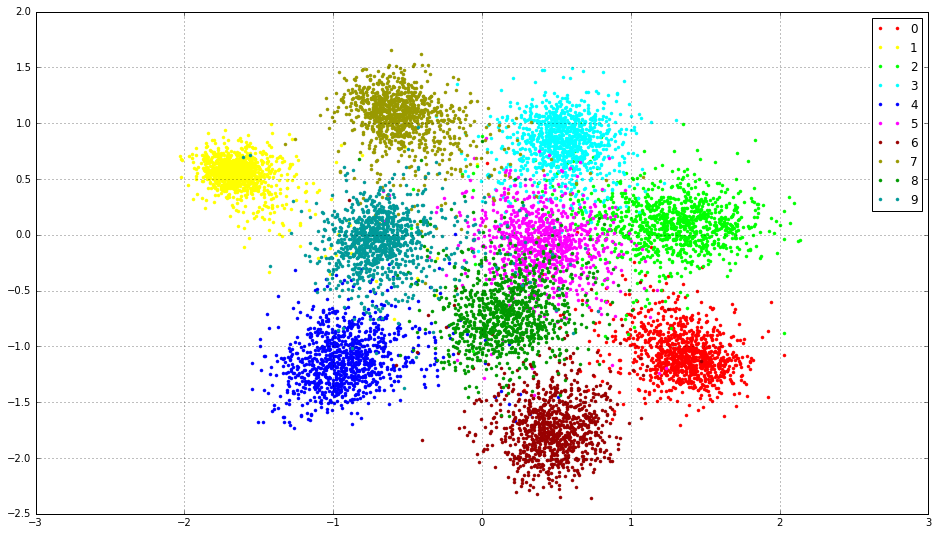

In [14]:
feat = out['feat']
f = plt.figure(figsize=(16,9))
c = ['#ff0000', '#ffff00', '#00ff00', '#00ffff', '#0000ff', 
     '#ff00ff', '#990000', '#999900', '#009900', '#009999']
for i in range(10):
    plt.plot(feat[labels==i,0].flatten(), feat[labels==i,1].flatten(), '.', c=c[i])
plt.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.grid()
plt.show()